<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/18-Naive-Bayes-and-NLP/Text_Classification_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Assessment

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [44]:
df = pd.read_csv('/content/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [45]:
df.isna().sum()

label      0
review    35
dtype: int64

In [46]:
df[df['review']==np.nan].head()

,label,review


In [47]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [48]:
df = df[df['review']!=np.nan]
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [49]:
df.isna().sum()

label      0
review    35
dtype: int64

In [50]:
df = df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [52]:
df['review'].str.isspace().sum()

27

In [53]:
df[df['review'].str.isspace()==True]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [57]:
df = df.drop(df[df['review'].str.isspace()].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [60]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## Training and Data

              precision    recall  f1-score   support

         neg       0.86      0.80      0.83       209
         pos       0.79      0.85      0.82       179

    accuracy                           0.82       388
   macro avg       0.82      0.83      0.82       388
weighted avg       0.83      0.82      0.83       388



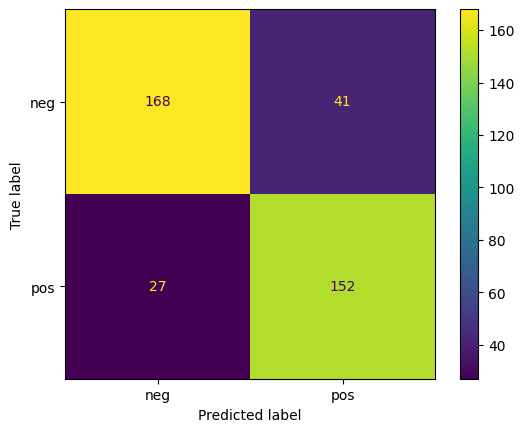

In [66]:
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')), ('log',LogisticRegression(max_iter=1000))])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)